Step 1: Loading and Preprocessing the Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = '/content/adult.csv'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
data = pd.read_csv(url, names=columns, na_values=' ?')

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 2: Random Forest Classifier with Cross-Validation

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

# Analyze cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: ", cv_scores.mean())
print("Standard Deviation of CV scores: ", cv_scores.std())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores:  [0.8537428  0.85118362 0.85105566 0.85105566 0.85231636]
Mean CV score:  0.8518708206360909
Standard Deviation of CV scores:  0.0010491926479098124


Step 3: Gradient Boosting Classifier for Overfitting and Underfitting


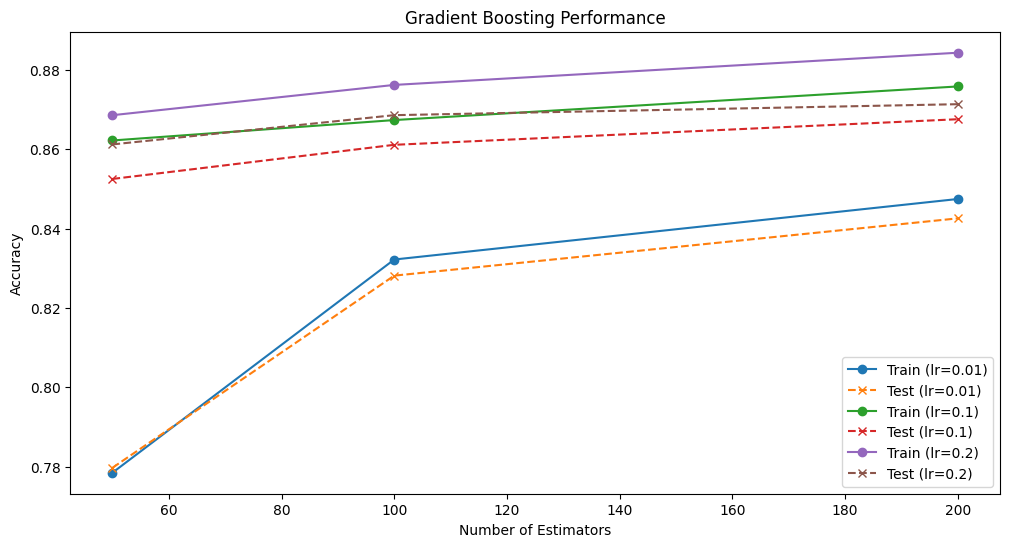

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Train Gradient Boosting classifier with varying numbers of estimators and learning rates
learning_rates = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]

results = {}
for lr in learning_rates:
    for n in n_estimators:
        gbc = GradientBoostingClassifier(learning_rate=lr, n_estimators=n, random_state=42)
        gbc.fit(X_train, y_train)
        train_score = gbc.score(X_train, y_train)
        test_score = gbc.score(X_test, y_test)
        results[(lr, n)] = (train_score, test_score)

# Plotting the results
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    train_scores = [results[(lr, n)][0] for n in n_estimators]
    test_scores = [results[(lr, n)][1] for n in n_estimators]
    plt.plot(n_estimators, train_scores, marker='o', label=f'Train (lr={lr})')
    plt.plot(n_estimators, test_scores, marker='x', linestyle='--', label=f'Test (lr={lr})')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Performance')
plt.legend()
plt.show()


Step 4: Precision, Recall, and F1-Score for Random Forests


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit the model and make predictions
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Precision:  0.7211740041928721
Recall:  0.5908115070845856
F1-score:  0.6495161670993628


Step 5: ROC Curve and AUC for Gradient Boosting Classifier

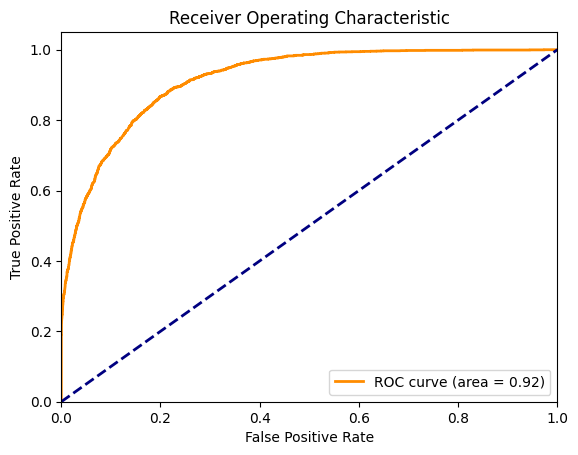

AUC:  0.916606358813834


In [5]:
from sklearn.metrics import roc_curve, auc

# Fit the Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_prob = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC: ", roc_auc)


Step 6: Model Performance Comparison with Different Metrics

In [6]:
from sklearn.svm import SVC

# Initialize classifiers
svm = SVC(probability=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

# List of classifiers
classifiers = [svm, rf, gbc]
classifier_names = ['SVM', 'Random Forest', 'Gradient Boosting']

# Evaluate each classifier using cross-validation and different metrics
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    accuracy = clf.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(roc_curve(y_test, y_prob)[0], roc_curve(y_test, y_prob)[1])

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("="*30)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: SVM
Accuracy: 0.76
Precision: 0.00
Recall: 0.00
F1-score: 0.00
ROC AUC: 0.63
Classifier: Random Forest
Accuracy: 0.85
Precision: 0.72
Recall: 0.59
F1-score: 0.65
ROC AUC: 0.90
Classifier: Gradient Boosting
Accuracy: 0.86
Precision: 0.77
Recall: 0.59
F1-score: 0.67
ROC AUC: 0.92
